<a href="https://colab.research.google.com/github/WilliamShengYangHuang/RC18_Machine_Learning/blob/main/Image_Processing_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Processing Basics**

## Import Packages

In [ ]:
import numpy as np

import cv2 as cv
from google.colab.patches import cv2_imshow # cv.imshow()

from scipy import ndimage as ndi
from skimage.io import imread
from skimage.io import imshow
from skimage import data
from skimage.exposure import histogram
from skimage.color import rgb2grey
from skimage.filters import gaussian

import matplotlib.pyplot as plt

from google.colab import drive

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5626428612433539827
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14417788928
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 1433787628709214481
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## Read Images

<ipython-input-8-2520d06d8c36>:3: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  img2 = rgb2grey(imread(PATH))


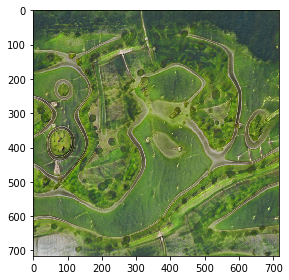

In [ ]:
PATH = '/content/drive/My Drive/test.png' #@param{type:"string"}
img = imread(PATH)
img2 = rgb2grey(imread(PATH))
w, d = img2.shape
imshow(img)

## Scale Images

Matrices for affine transformation operations:

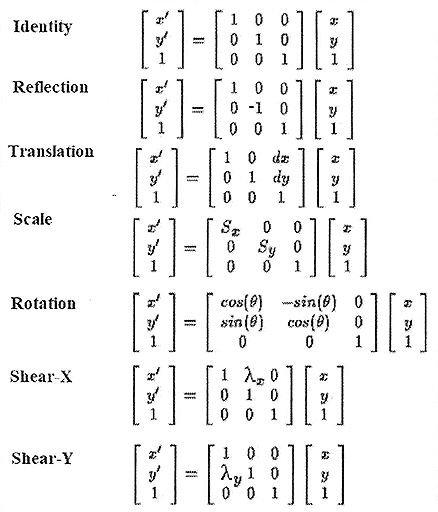

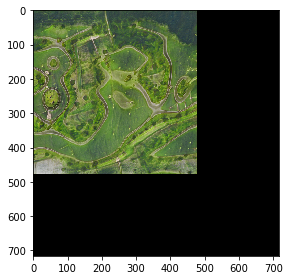

In [ ]:
scale_x = 1.5 #@param{type:"slider", min:0, max:4, step:0.25} 
scale_y = 1.5 #@param{type:"slider", min:0, max:4, step:0.25} 
img_scale = np.array([[scale_x, 0 ,0], [0, scale_y, 0], [0, 0, 1]])
img_scaled = ndi.affine_transform(img, img_scale)
# plt.axis('off')
imshow(img_scaled)

## Subplots

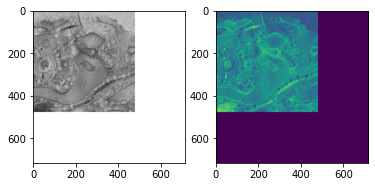

In [ ]:
img_scale = np.array([[scale_x, 0 ,0], [0, scale_y, 0], [0, 0, 1]])
img_scaled = ndi.affine_transform(img2, img_scale)

fig, (ax, ax2) = plt.subplots(1, 2) 
ax.imshow(img_scaled, cmap='binary')
ax2.imshow(img_scaled, cmap='viridis')

## Plot Histogram

`plt.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)`

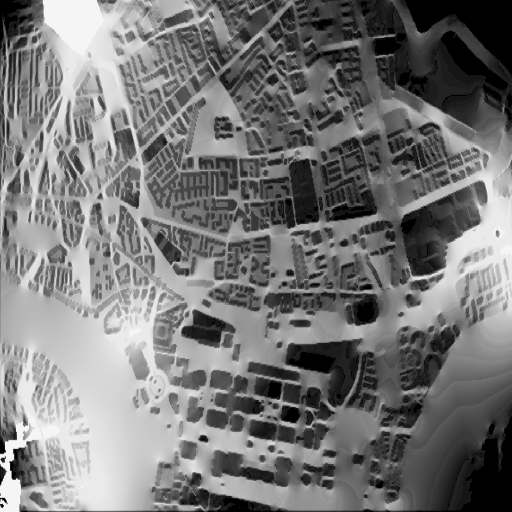

In [ ]:
# Read image as grayscale image 
path = "/content/drive/My Drive/site_connectivity.png"

im = cv.imread(path,cv.IMREAD_GRAYSCALE)
im = cv.resize(im, dsize=(512, 512))
cv2_imshow(im)

<a list of 210 Patch objects>
<a list of 210 Patch objects>
<a list of 210 Patch objects>
<a list of 210 Patch objects>
<a list of 210 Patch objects>
<a list of 210 Patch objects>
<a list of 210 Patch objects>
<a list of 210 Patch objects>
<a list of 210 Patch objects>
<a list of 210 Patch objects>
<a list of 210 Patch objects>
<a list of 210 Patch objects>
<a list of 210 Patch objects>
<a list of 210 Patch objects>
<a list of 210 Patch objects>
<a list of 210 Patch objects>
<a list of 210 Patch objects>
<a list of 210 Patch objects>
<a list of 210 Patch objects>
<a list of 210 Patch objects>
<a list of 210 Patch objects>
<a list of 210 Patch objects>
<a list of 210 Patch objects>
<a list of 210 Patch objects>
<a list of 210 Patch objects>
<a list of 210 Patch objects>
<a list of 210 Patch objects>
<a list of 210 Patch objects>
<a list of 210 Patch objects>
<a list of 210 Patch objects>
<a list of 210 Patch objects>
<a list of 210 Patch objects>
<a list of 210 Patch objects>
<a list of

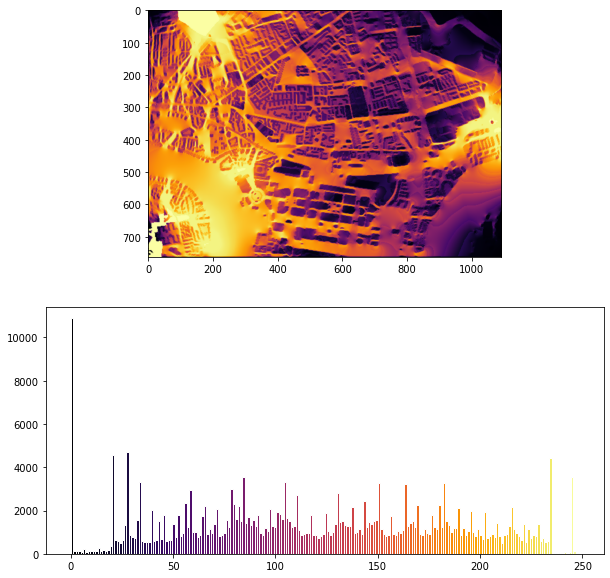

In [ ]:
plt.figure(figsize=(10, 10)) # set figure size 

# top subplot 
plt.subplot(211) 
im2 = plt.imread(path)
plt.imshow(im2)

# bottom subplot 
plt.subplot(212)
num_of_bins = 210 #@param {type:'slider', min:0, max:512, step:1}

vals = im.flatten()

# plot histogram with 255 bins
b, bins, patches = plt.hist(vals, num_of_bins, edgecolor='white')
cm = plt.get_cmap('inferno') # set colour map
for i in range(len(patches)):
    color = cm(1.*i/len(patches))  
    patches[i].set_facecolor(color)
   
#plt.xlim([0,255])
#plt.show()

## Canny Edge Detection

`cv.Canny(image, threshold1, threshold2)`

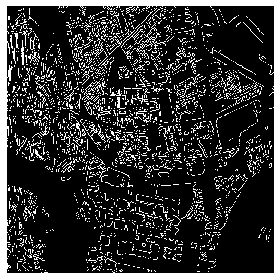

In [ ]:
import cv2 as cv
threshold_1 = 164 #@param{type:"slider", min:0, max:512, step:1}
threshold_2 = 236 #@param{type:"slider", min:0, max:512, step:1}
edges = cv.Canny(im, threshold_1, threshold_2)
plt.axis('off')
imshow(edges)

In [ ]:
def Can_series(im, threshold_1, threshold_2, )

SyntaxError: ignored

## To Numpy Array

In [ ]:
IMG = np.array(im)
IMG

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [246, 245, 245, ...,   0,   0,   0],
       [246, 245, 245, ...,   0,   0,   0],
       [246, 246, 246, ...,   0,   0,   0]], dtype=uint8)

## From Numpy Array to List

In [ ]:
IMG_f = IMG.flatten()
IMG_f

NameError: ignored

## To Pandas Data Frame

In [ ]:
df_IMG = pd.DataFrame(IMG_f)
df_IMG

,0
0,0
1,0
2,0
3,0
4,0
...,...
262139,0
262140,0
262141,0
262142,0


## Flip Matrix

In [ ]:
IMG_f_r = IMG_f.reshape(1, -1)
IMG_f_r

array([[0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
df_IMG_2 = pd.DataFrame(IMG_f_r)
df_IMG_2

,0,1,2,3,4,5,6,7,8,9,...,262134,262135,262136,262137,262138,262139,262140,262141,262142,262143
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


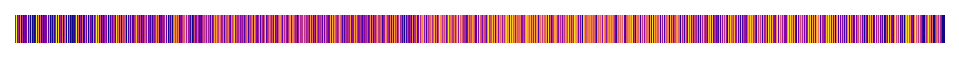

In [ ]:
plt.figure(figsize=(8, 0.25), dpi=150)

pos_x = []
for i in range(0, len(IMG_f)):
  pos_x.append(i)

pos_y = [0]* len(IMG_f)

plt.scatter(pos_x, pos_y, marker='|', c=IMG_f_r) 
plt.pcolormesh(IMG_f_r, cmap='plasma')
plt.axis('off')

SAVING_PATH = "/content/drive/My Drive"
plt.savefig(SAVING_PATH + '/strip.png', dpi=150) # must to be placed before plt.show()

plt.show()

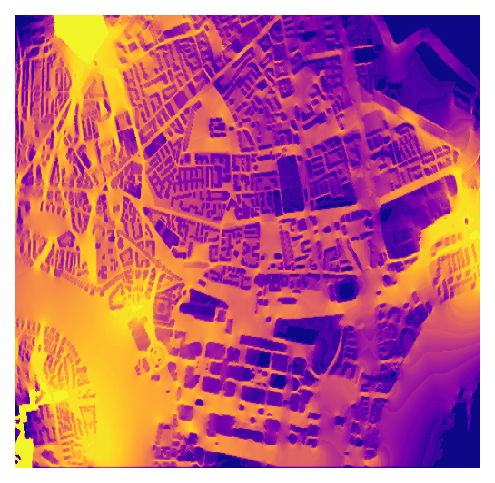

In [ ]:
RE = np.array_split(IMG_f, 512) # split the list into 512 sub-lists

import seaborn as sns
plt.figure(figsize=(4, 4), dpi=150)
plt.axis('off')
sns.heatmap(RE, cmap='plasma', cbar=False, annot=False)

However, this dimensionality does not fulfill our demands: We want an image as a row rather than a column.